In [1]:
import tensorflow as tf
from src.ml.model import get_cnn_model, get_model

### Convolutional neural network

Montecarlo tree search (MCTS) requires a neural network to help it lead the search. Initially a model with random weights is initialized to be used by MCTS and overtime it is trained to give more accurate results. 

A state $s$ is represented using a 3-dimensional matrix that describes the maze, robots positions and their home targets. A convolutional neural network with a traditional Lenet-5 architecture is utilized, however it contains two outputs: 
- $v$ represents the value of a state, whether it will be a win, loss or draw
- $p$ probability distribution over each action. Number 16 comes from the number of robots in the maze: 4, multiplied by the number of actions per robot: 4 (North, South, East and West)

In [2]:
cnn = get_cnn_model((31, 31, 9), n_outputs=16, convolutions=3, optimizer='adam', seed=26)
cnn.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 31, 31, 9)]  0                                            
__________________________________________________________________________________________________
conv_0 (Conv2D)                 (None, 31, 31, 64)   9280        input[0][0]                      
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 15, 15, 64)   0           conv_0[0][0]                     
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 15, 15, 64)   65600       max_pooling2d[0][0]              
______________________________________________________________________________________________

In [3]:
!pip3 install pydot

In [4]:
!pip3 install pydotplus

In [5]:
!pip3 install graphviz

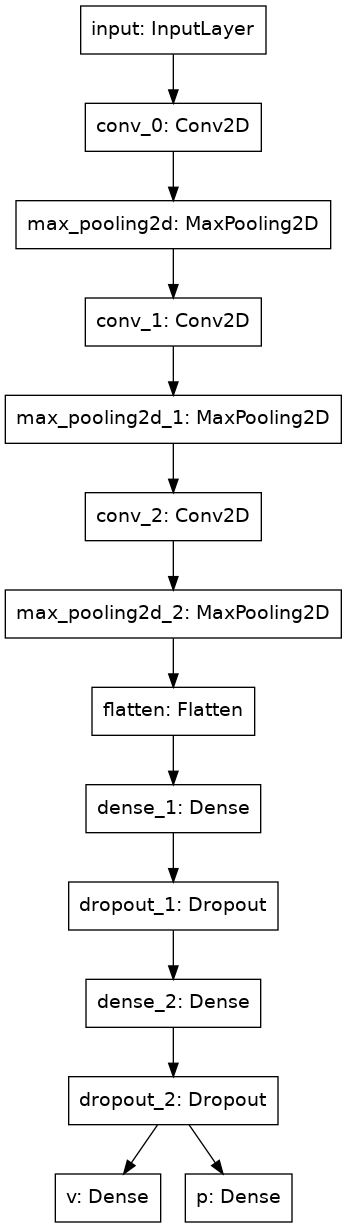

In [6]:
from tensorflow.keras.utils import plot_model

plot_model(cnn, to_file='model_plot.png')

Initial model is stored to be used by the MCTS when the dataset is generated.

In [ ]:
cnn.save('model/model_0')

In [ ]:
cnn.save_weights('robot_reboot_model/model_0/')